K-Nearest Neighbour Tutorial
-------------------------
"All neighbors are equal, but some are more equal than the others."

Properties:
    - Supervised Learning Algorithm: Needs labelled data to make predictions.
    - Non-parametric: It does not make any assumptions on the underlying data distribution
    
    - Lazy Algorithm: Doesn't learn any model for classification (or regression, but knn on regression sucks). Also called Instance-based learning. It chooses to memorize the training instances which are subsequently used as “knowledge” for the prediction phase. Concretely, this means that only when a query to our database is made (i.e. when we ask it to predict a label given an input), will the algorithm use the training instances to spit out an answer. Minimal Training, but testing is very expensive.

    - Normally used as a base benchmark, and to get some initial insights about a dataset.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline


In [2]:
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data.txt', header=None, names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


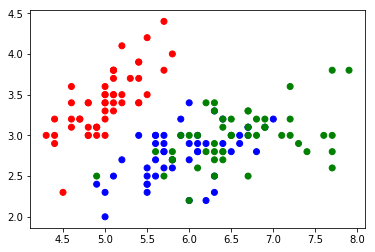

In [3]:
fig, ax = plt.subplots()
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}
ax.scatter(df['sepal_length'], df['sepal_width'], c=df['class'].apply(lambda x: colors[x]))

plt.show()

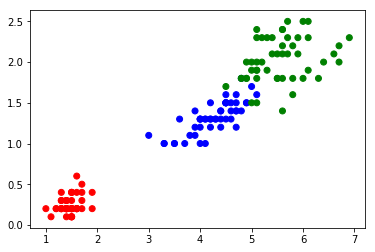

In [4]:
_, bx = plt.subplots()
bx.scatter(df['petal_length'], df['petal_width'], c=df['class'].apply(lambda x: colors[x]))
plt.show()

In [5]:
# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:4]) 	# end index is exclusive
y = np.array(df['class']) 	# another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
#print(X)

In [7]:
#print(y)

## Running the K-Nearest Neighbour scikit-learn function (K = 3)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nAccuracy of scikit-learn knn classifier for k = 3 is %d%%' % acc)


Accuracy of scikit-learn knn classifier for k = 3 is 98%


In [9]:
neighbors = list(range(1,50,2))
print(neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]



The optimal number of neighbors is 7.


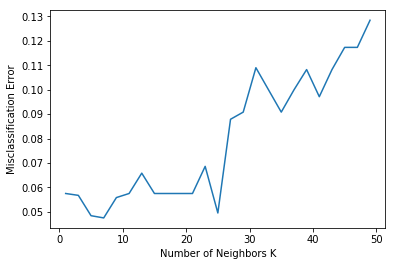

In [10]:
# empty list that will hold cross-validation scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Training Function

In [11]:
def train(X_train, y_train):
    # does nothing, its a dummy function 
    return

## Inference (Prediction) Function

In [12]:
def predict(X_train, y_train, x_test, k):
    # create 2 Lists2 store distances and targets
    # Targets are the associated labels of the k-Nearest Neighbours
    distances = []
    targets = []

    for i in range(len(X_train)):
        # first we compute the Euclidean Distance
        distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
        # add it to list of distances
        distances.append([distance, i])

    # sort the list
    distances = sorted(distances)

    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # Perform a majority vote using a Counter. Return most common target
    return Counter(targets).most_common(1)[0][0]


## k-Nearest Neighbour Function

In [13]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # check if k larger than n
    if k > len(X_train):
        raise ValueError

    # train on the input data
    train(X_train, y_train)

    # predict for each testing observation
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

In [14]:
## Running our code on the testing set

In [15]:
# making our predictions 
predictions = []
try:
    kNearestNeighbor(X_train, y_train, X_test, predictions, 7)
    predictions = np.asarray(predictions)

    # evaluating accuracy
    accuracy = accuracy_score(y_test, predictions) * 100
    print('Accuracy Score: %d%%' % accuracy)

except ValueError:
    print('Can\'t have more neighbors than training samples!!')

\Accuracy Score: 98%
